# FRUIT CNN

## 1 Abstract:

In questo progetto è stata realizzata una rete neurale convoluzionale CNN da zero per risolvere un problema di classificazione dei vari tipi di frutta e verdura dal dataset Fruits-360 di Kaggle.
Il dataset contiene 206 diverse tipologie di frutta e verdura, contenente immagini da diverse angolazioni su sfondo bianco.
La rete CNN è stata sviluppata utilizzando un architettura contenente tre strati di layer Convolution2D, ognuno con un numero di filtri sempre maggiore per rilevare dettagli sempre più precisi, sono stati ultimati usando tecniche di padding e maxpooling,successivamente è stato introdotto uno strato dense, un livello di dropout per evitare l'overfitting durante l' addestramento ed infine un  layer dense per le predizioni.
Sono stati eseguiti diversi studi sui valori degli iperparametri fondamentali, ovvero il learning rate e il valore del DropOut, mostrando perchè la scelta effettuata è la più efficiente. 
Il modello prodotto è un' alternativa ai classici modelli utilizzati per questa tipologia di dataset, riportando alti livelli di precisione, come un accuratezza del 97% sul dataset di validazione.

## 2 Structure:

### 2.1 DataSet:

Per eseguire l' addestramento e la valutazione del modello prodotto è stato utilizzato il dataset Fruits 360 di Kaggle[1].
Sono state utilizzate tutte le 206 classi appartenenti al dataset.
Le immagini contengono varie tipologie di frutta e verdura in dimensione 100x100 pixel, fotografate con diverse angolazioni e con una luce controllata, tutte eseguite su sfondo bianco opaco.
Questa caratteristica permette alla rete di apprendere molto bene le varie caratteristiche delle immagini, in quanto avendo sempre lo stesso sfondo i parametri vengono otimizzati più rapidamente, semplificando il processo di apprendimento del modello.
Inoltre avendo l' immagine centrata, permette a determinati parametri di ottimizzarsi per concentrarsi sull' identificazione del frutto.

### 2.2 Data Preparation:

Le immagini sono state suddivise in batches di dimensione 30 grazie ad un generatore, utilizzando un processo chiamato lazy loading, ovvero le immagini vengono caricate un batch alla volta per non appesantire la RAM durante il training del modello.
Prima dell' addestramento i dati sono stati normalizzati rispetto al valore massimo d'intensità di ogni pixel, ovvero $2^8-1$ ,per permettere un' addestramento più efficiente del modello ed evitare divergenze nel processo di training.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

n=10 #number of epochs
datatrain="data/Training"
datatest="data/Test"
img=(100,100)
batches=30 #number of baches of training dataset
tf.keras.utils.set_random_seed(10) #set seed value for reproducibility
    
train_dataset = tf.keras.utils.image_dataset_from_directory( #makes the computation weight lighter
    datatrain,
    label_mode='categorical',
    image_size=img,
    batch_size=batches
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    datatest,
    label_mode='categorical',
    image_size=img,
    batch_size=batches
)

Found 103993 files belonging to 206 classes.
Found 34711 files belonging to 206 classes.


### 2.3 CNN Structure:

**aggiungere la descrizione e le formule della convoluzione**
La rete convoluzionale accetta in input un tensore di dimensione 100x100x3, ovvero le dimensioni delle immagini del dataset, seguite da 3 hidden layers convoluzionali con 16,32 e 64 filtri.
In ognuno di essi è stata utilizzata la funzione di attivazione Relu,perchè **da completare**.
È stato utilizzato il padding per mantenere le dimensioni delle immagini costanti dopo l'utilizzo dei filtri.
Successivamente ad ogni strato convoluzionale è viene eseguito un operazione di maxpooling di dimensione 2x2, esso prende una matrice 2x2 dei dati in input e ne sceglie il valore più alto, riducendo di 4 volte la dimensione dell' immagine in input, rendendo più leggera l'immagine ed aumentandone l' astrattezza per evitare problemi di traslazione della figura.
Infine il tensore rappresentante l'immagine finale viene srotolato in un unico vettore grazie all'operazione Flatten.
Dopodichè vi è uno strato Dence di dimensione 64, sempre con Relu come funzione di attivazione, seguito da un livello di DropOut pari a 0.1, esso è stato introdotto per rallentare l' apprendimento iniziale, riducendo l' overfitting. 
Esso spegne il 10% degli output del layer precedente.
Infine vi è un livello Dence di dimensione pari al numero delle classi da predirre, ovvero 206, esso utilizza la funzione di attivazione softmax, la migliore per restituire la distribuzione di probabilità che l' immagine scelta sia o meno un determinato frutto.
La struttura della rete è stata implementata utilizzando le librerie Keras[2] di TensorFlow[3].
**inserire l' immagine dell'idea dietro le CNN e la reference** [4].

In [11]:
model = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(100,100,3)),
tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=64, activation='relu'),
tf.keras.layers.Dropout(0.1), 
tf.keras.layers.Dense(units=206, activation='softmax')])

**spiegare le scelte fatte**

In [12]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
history=model.fit(
    train_dataset,
    epochs=n,
    validation_data=test_dataset
)

Epoch 1/10
3467/3467 [==============================] - 205s 59ms/step - loss: 1.0621 - accuracy: 0.7115 - val_loss: 0.3012 - val_accuracy: 0.9286
Epoch 2/10
3467/3467 [==============================] - 302s 87ms/step - loss: 0.3080 - accuracy: 0.8986 - val_loss: 0.2421 - val_accuracy: 0.9428
Epoch 3/10
3467/3467 [==============================] - 232s 67ms/step - loss: 0.2182 - accuracy: 0.9285 - val_loss: 0.1875 - val_accuracy: 0.9591
Epoch 4/10
3467/3467 [==============================] - 213s 61ms/step - loss: 0.1636 - accuracy: 0.9470 - val_loss: 0.1751 - val_accuracy: 0.9601
Epoch 5/10
3467/3467 [==============================] - 221s 64ms/step - loss: 0.1298 - accuracy: 0.9573 - val_loss: 0.1810 - val_accuracy: 0.9659
Epoch 6/10
3467/3467 [==============================] - 219s 63ms/step - loss: 0.1091 - accuracy: 0.9649 - val_loss: 0.1608 - val_accuracy: 0.9687
Epoch 7/10
3467/3467 [==============================] - 222s 64ms/step - loss: 0.0898 - accuracy: 0.9706 - val_loss: 0

Qui di seguito viene riportata la descrizione degli iperparametri della rete. 
Essa è costituita da 626862 parametri addestrabili, dove il 94% di essi è racchiuso nel layer Dense, questo a causa del parameter sharing **spiegare bene cos'è**

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 64)       

## 3 Data Analisys:

### 3.1 Loss & Accuracy:

Qui in seguito viene riportato il confronto tra accuracy e validation accuracy nel primo grafico, nel secondo grafico invece il confronto fra loss e validation loss.
Le curve di loss ed accuracy nel training mostrano un continuo miglioramento, dimostrando che il modello apprende bene le immagini.
I grafici mostrano una validation accuracy in continuo miglioramento, raggiungendo valori elevati intorno al 96% molto rapidamente, fino a stabilizzarsi intorno al 97%. L'andamento delle curve di validation è più altalenante rispetto a quello di training ma mostra comunque un progressivo miglioramento.
L'andamento della curva di validation loss mostra che il modello riesce a generalizzare bene, evitando problemi di overfitting.
Si può osservare come i valori di training e validation non siano molto diversi fra loro, questo dimostra che il modello apprende bene la struttura delle immagini e riesce a performare anche su immagini dello stesso dataset mai viste prima.
I grafici sono stati realizzati con la libreria Matplotlib[5] di Python.

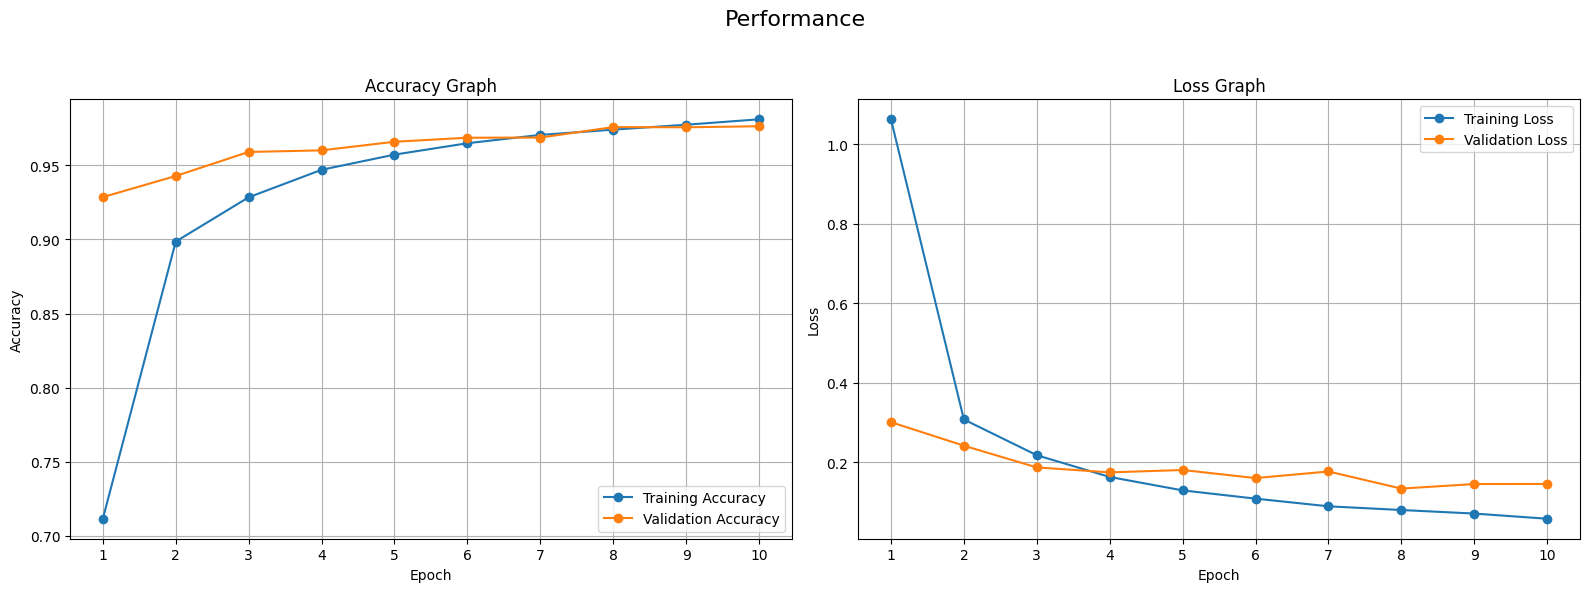

In [15]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_labels=[]
for i in range(n):
    epochs_labels.append(i+1)

#Accuracy Graph
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.xticks(ticks=range(n),labels=epochs_labels)
plt.plot(range(n),acc,'o-',label='Training Accuracy')
plt.plot(range(n),val_acc,'o-',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

#Loss Graph
plt.subplot(1,2,2)
plt.xticks(ticks=range(n),labels=epochs_labels)
plt.plot(range(n),loss,'o-',label='Training Loss')
plt.plot(range(n),val_loss,'o-',label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Performance',fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()




### 3.2 Confusion Matrix & Classification Report: 

Per rappresentare l' efficienza del modello è stata creata la confusion matrix.
Sulle colonne vi sono le 206 classi di frutta e verdura usate come input nel test del modello, sulle righe invece vi sono le 206 classi di frutta e verdura predette, quando esse coincidono significa che il modello ha risolto correttamente il problema di classificazione.
essa mostra un' alta intensità di colore sulla diagonale, mostrando che la maggior parte delle classi predette sono effettivamente uguali a quelle originali, sinonimo di buone performance del modello.
L' intensità del colore rappresenta una percentuale su tutte le immagini appartenenti ad una classe del dataset, la percentuale nasce da una normalizzazione dei dati rispetto al numero di immagini di una classe del test, a causa della diversa quantità di immagini per ogni classe usate per i test.
Vi sono alcune classi di frutta che tendono ad essere predette erroneamente, mostrando dei leggeri frammenti di colore più intenso nel resto della matrice.
La matrice è stata creata con le librerie Seaborn[6] e Sklearn[7] di Python.

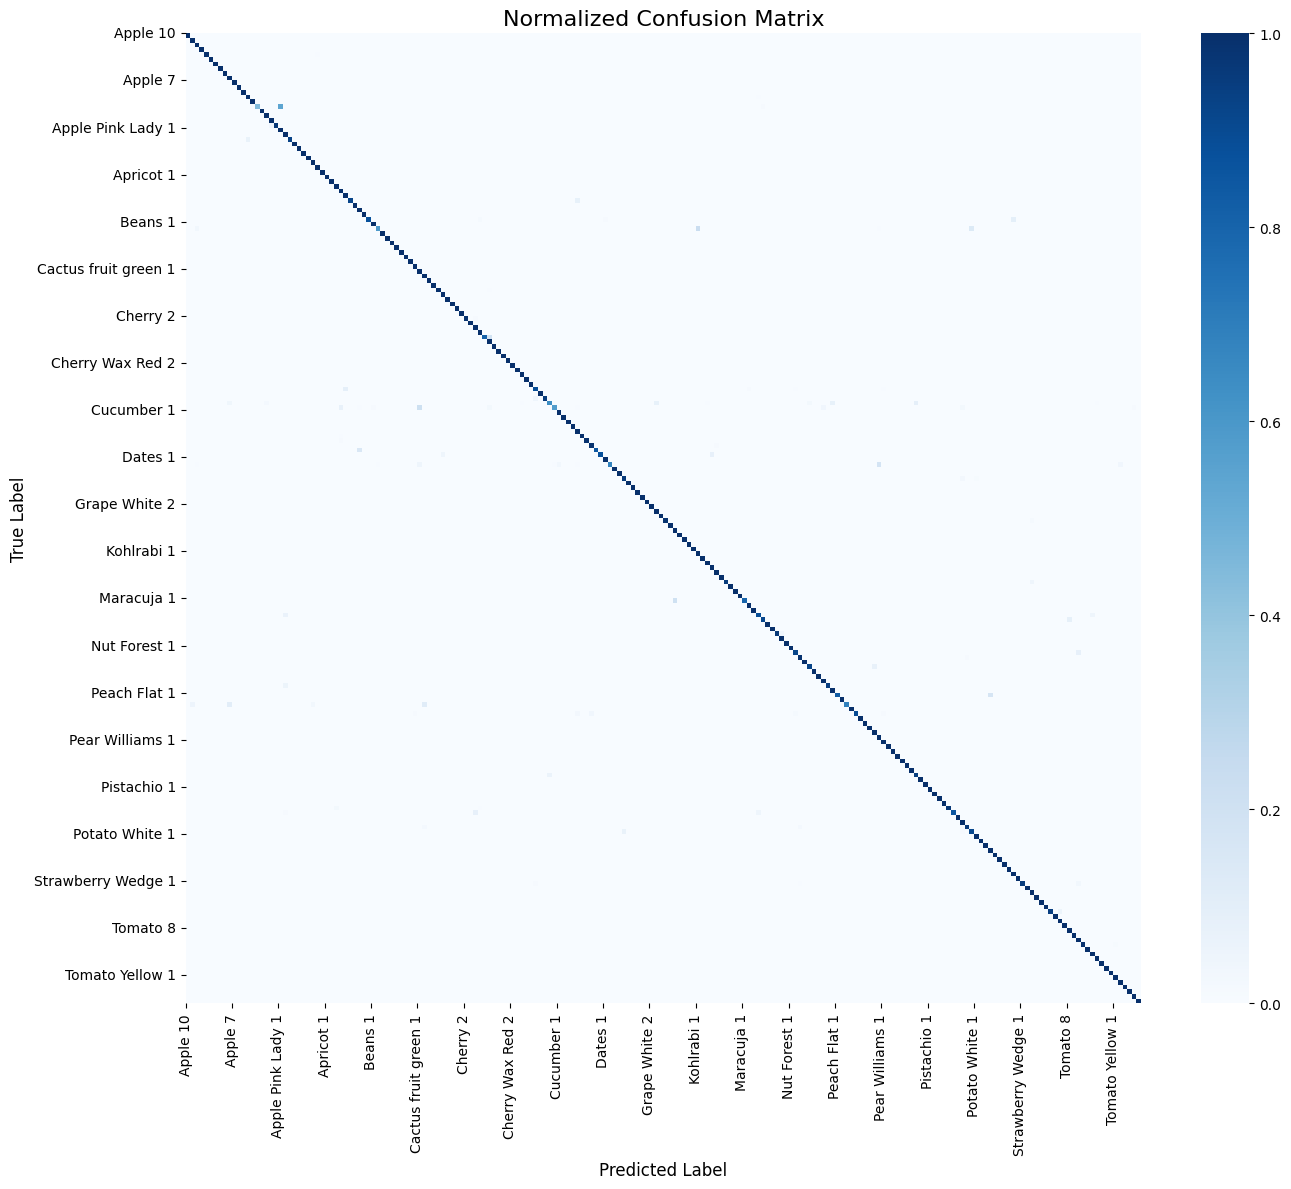

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

ytrue=[]
ypred=[]
folder="data/Test"
class_names=sorted(os.listdir(folder))

for image_batch,label_batch in test_dataset:
    ytrue.extend(np.argmax(label_batch,axis=1))
    preds=model.predict(image_batch,verbose=0)
    ypred.extend(np.argmax(preds,axis=1))

cm=confusion_matrix(ytrue,ypred,normalize='true') #confusion matrix
plt.figure(figsize=(14,12))
sns.heatmap(cm,annot=False,cmap='Blues')

plt.title("Normalized Confusion Matrix",fontsize=16)
plt.ylabel("True Label",fontsize=12)
plt.xlabel("Predicted Label",fontsize=12)

spacing=10  #show 1/10 classes every time
positions=[] #numeric position of the labels
labels=[]  # name of classes

for i,class_name in enumerate(class_names):
    if i%spacing==0:
        positions.append(i)
        labels.append(class_name)

plt.xticks(positions,labels,rotation=90)
plt.yticks(positions,labels)
plt.tight_layout()
plt.show()

Per rappresentare in maniera più accurata le performance del modello rispetto ad ogni classe del dataset è stato creato un classification report.
Esso contiene 4 valori:
- 1 Precision: **da completare**
- 2 Recall: indica la percentuale di una classe di essere stata azzeccata correttamente rispetto a tutte le immagini di quella classe
- 3 f1-Score: è la media armonica fra precision e recall, la cui formula è: $\frac{2PR}{P+R}$, dove $P$ è la Precision and $R$ è il Recall
- 4 Support: indica il numero di immagini di test appartenente ad una determinata classe
Infine vi sono i valori finali di **boh, esegui e lo scopri**

In [29]:
from sklearn.metrics import classification_report,accuracy_score

print("\nFinal Report:")
globalacc = accuracy_score(ytrue, ypred)
print(f"Accuracy: {globalacc:.4f}") # to print 4 decimal
print(classification_report(ytrue,ypred,target_names=test_dataset.class_names))


Final Report:
Accuracy: 0.9764
                           precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 11       0.92      1.00      0.96       142
                 Apple 12       0.96      1.00      0.98       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      0.99      1.00       154
                 Apple 17       1.00      1.00      1.00       201
                 Apple 18       1.00      1.00      1.00       160
                 Apple 19       1.00      1.00      1.00       241
                  Apple 5       1.00      1.00      1.00       146
                  Apple 6       0.84      1.00      0.91       157
                  Apple 7       1.00      1.00      1.00       229
                  Apple 8       1.00      1.00      1.00       228
                  Apple 9       1.00      1.00      1.00       231
         Apple Braeburn 1    

### 3.3 Random Test:

In questa sezione è stato messo alla prova il modello pescando randomicamente un' immagine per ognuna delle 206 classi.
La scelta casuale dell' immagine implica che l' accuratezza del test sia una misura qualitativa, a cuasa della possibilità che l' immagine scelta ha un' angolazione molto accentuata rispetto ad una centrale.
Il test ha prodotto un accuratezza di 96.6% con 7 errori.
Ecco riportate le immagini dei frutti predetti erroneamente con la relativa confidenza assunta dal modello.

Accuracy: 96.60%
Correct Guesses: 199/206
Mistakes: 7


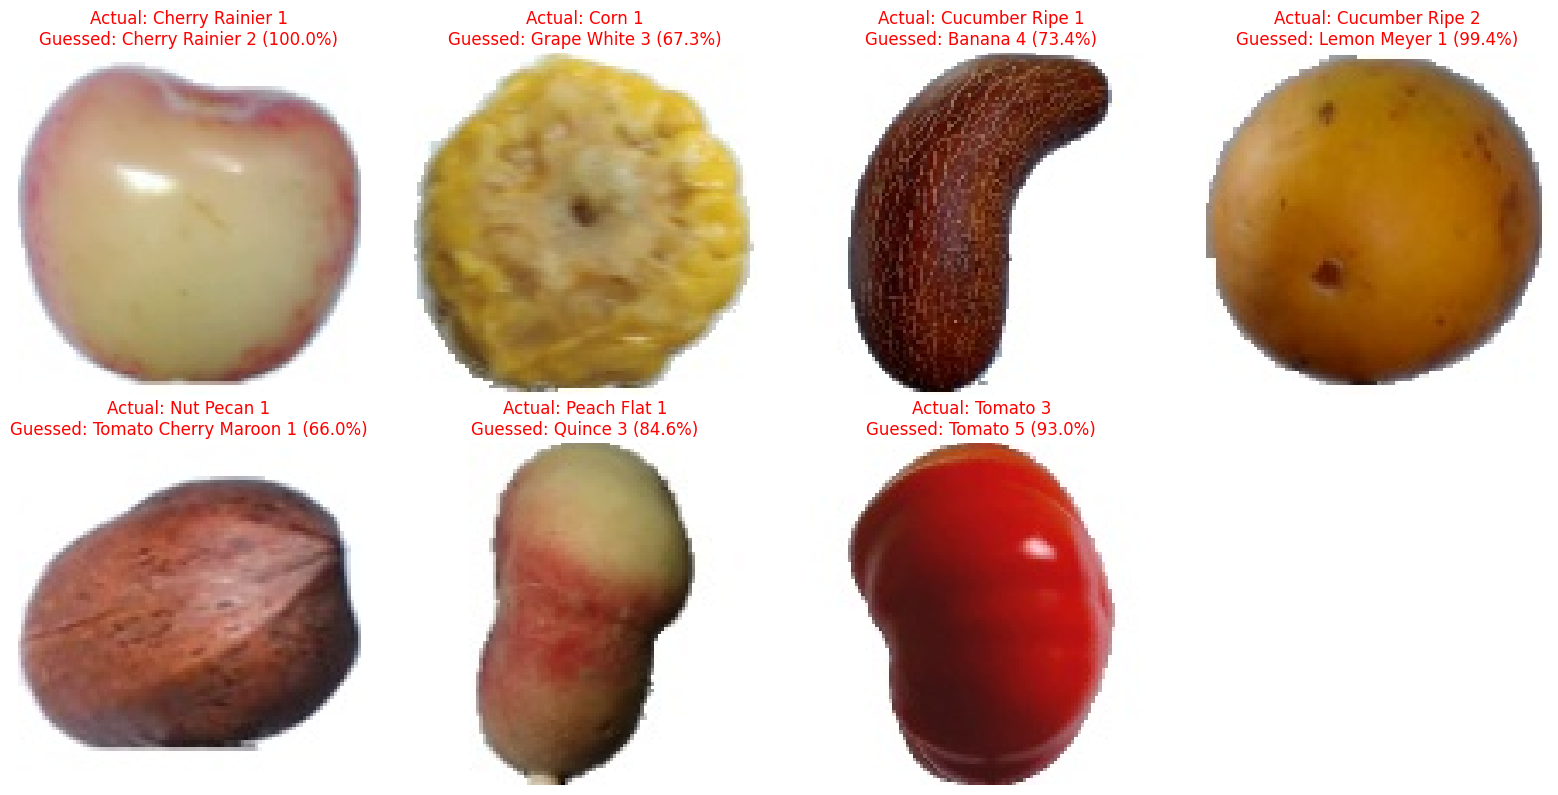

In [20]:
import random
def predict_image(image_path):
    image=tf.keras.utils.load_img(image_path, target_size=(100, 100))
    image_array=tf.keras.utils.img_to_array(image)
    image_batch=np.expand_dims(image_array, axis=0)
    scores=model.predict(image_batch, verbose=0)
    best_guess_index=np.argmax(scores[0])
    predicted_label=class_names[best_guess_index]
    confidence=100*np.max(scores[0])
    return predicted_label,confidence

mistakes=[]
correct_guesses=0

for actual_label in class_names:
    image_folder=os.path.join(folder,actual_label)
    random_image_file=random.choice(os.listdir(image_folder))
    path_to_image=os.path.join(image_folder,random_image_file)
    
    predicted_label,confidence=predict_image(path_to_image)
    
    if predicted_label==actual_label:
        correct_guesses+=1
    else:
        mistakes.append({
            "path":path_to_image,
            "actual":actual_label,
            "guess":predicted_label,
            "confidence":confidence
        })

total_images=len(class_names)
accuracy=(correct_guesses/total_images)*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Correct Guesses: {correct_guesses}/{total_images}")
print(f"Mistakes: {len(mistakes)}")

if mistakes:
    num_mistakes=len(mistakes)
    num_cols=4
    num_rows=(num_mistakes+num_cols-1)//num_cols
    
    plt.figure(figsize=(16,4*num_rows))
    
    for i,mistake in enumerate(mistakes):
        plt.subplot(num_rows, num_cols, i+1)
        
        image=tf.keras.utils.load_img(mistake["path"])
        plt.imshow(image)
        plt.axis('off')
        
        plt.title(
            f"Actual: {mistake['actual']}\n"
            f"Guessed: {mistake['guess']} ({mistake['confidence']:.1f}%)",
            color='red'
        )
        
    plt.tight_layout()
    plt.show()
else: 
    print("\nThe model made no mistakes in this test")

Il test mostra chiaramente come una delle lacune del modello siano le immagini di frutti fuotati di 90 gradi rispetto all' asse verticale, questo modifica la forma del frutto, rendendo più difficile da identificare correttamente e confondendolo con un altro. 

### 4 Iperparameter & Model Comparison:

In questa sezione viene analizzato l'impatto di due iperparametri fondamentali sulle performance del modello: il learning rate dell'ottimizzatore e il tasso di regolarizzazione Dropout. Lo scopo è giustificare le scelte operate per il modello finale attraverso uno studio comparativo.

### 4.1 Learning Rate:

Il learning rate è uno degli iperparametri più importanti nel training, esso comprare in: **inserisci formula**
Esso permette di **spiegazione matematica**.
Il learning rate utilizzato nel modello standard è $\eta=0.001$, esso è stato variato a $\eta=0.01$ e $\eta=0.0001$, dove sono stati messi a confronto i riultati ottenuti nei grafici sottostanti:

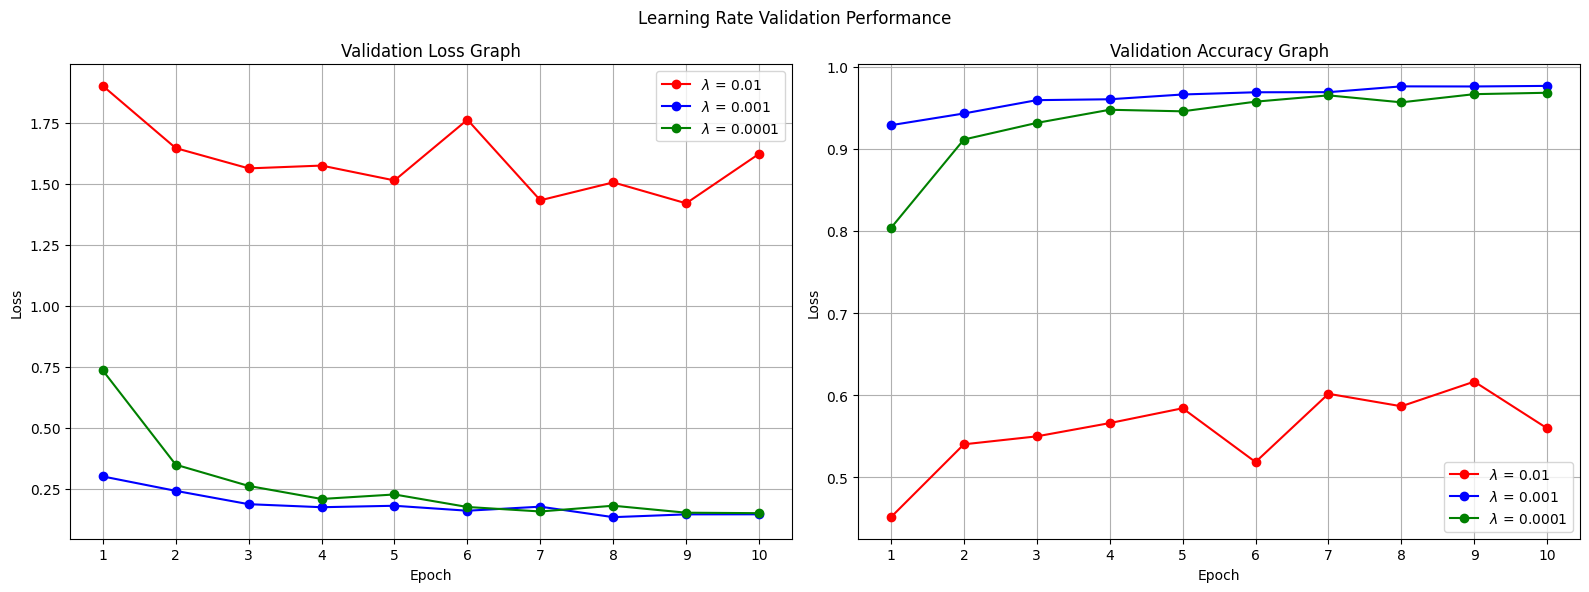

In [21]:
datahigh=np.loadtxt("lr_high.dat")
datalow=np.loadtxt("lr_low.dat")
loss_low=datalow[:,2]
loss_high=datahigh[:,2]
acc_low=datalow[:,3]
acc_high=datahigh[:,3]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Validation Loss Graph')
plt.xticks(ticks=range(1,n+1)) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,n+1),loss_high,"o-",label="$\lambda$ = 0.01",color="red")
plt.plot(range(1,n+1),val_loss,"o-",label="$\lambda$ = 0.001",color="blue")
plt.plot(range(1,n+1),loss_low,"o-",label="$\lambda$ = 0.0001",color="green")
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title("Validation Accuracy Graph")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=range(1,n+1)) 
plt.plot(range(1,n+1),acc_high,"o-",label="$\lambda$ = 0.01",color="red")
plt.plot(range(1,n+1),val_acc,"o-",label="$\lambda$ = 0.001",color="blue")
plt.plot(range(1,n+1),acc_low,"o-",label="$\lambda$ = 0.0001",color="green")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout(rect=[0,0,1,0.95])
plt.suptitle("Learning Rate Validation Performance")


plt.show()

Un learning rate più alto tende a peggiorare significativamente le prestazioni del modello, mentre un learning rate più basso non modifica di molto le prestazioni, ma esse vengono raggiunte più lentamente usando lo stesso numero di epoche per l'addestramento.
Questo rende $\eta=0.001$ preimpostato della funzione Adam il compromesso ideale.

### 4.2 Dropout:

Il tasso di regolarizzazione Dropout rappresenta la quantità di neuroni,scelti randomicamente, a cui viene impostato temporaneamente l'output a zero durante il processo di training in un batch, per poi essere ripristinato.Infine si ripete lo stesso procedimento cambiando serie di neuroni per ogni batch.
È stato valutato come il tasso di DropOut(indicato con $\delta$) influisca sulle performance dell'addestramento del modello, in particolare sono stati studiati i risultati ottenuti utilizzando valori di dropout $\delta_{1} =0$ , $\delta_{2} =0.1$ , $\delta_{3} =0.25$.
Qui sotto vengono riportati i grafici delle rispettive performance:

Text(0.5, 0.98, 'DropOut Validation Performance')

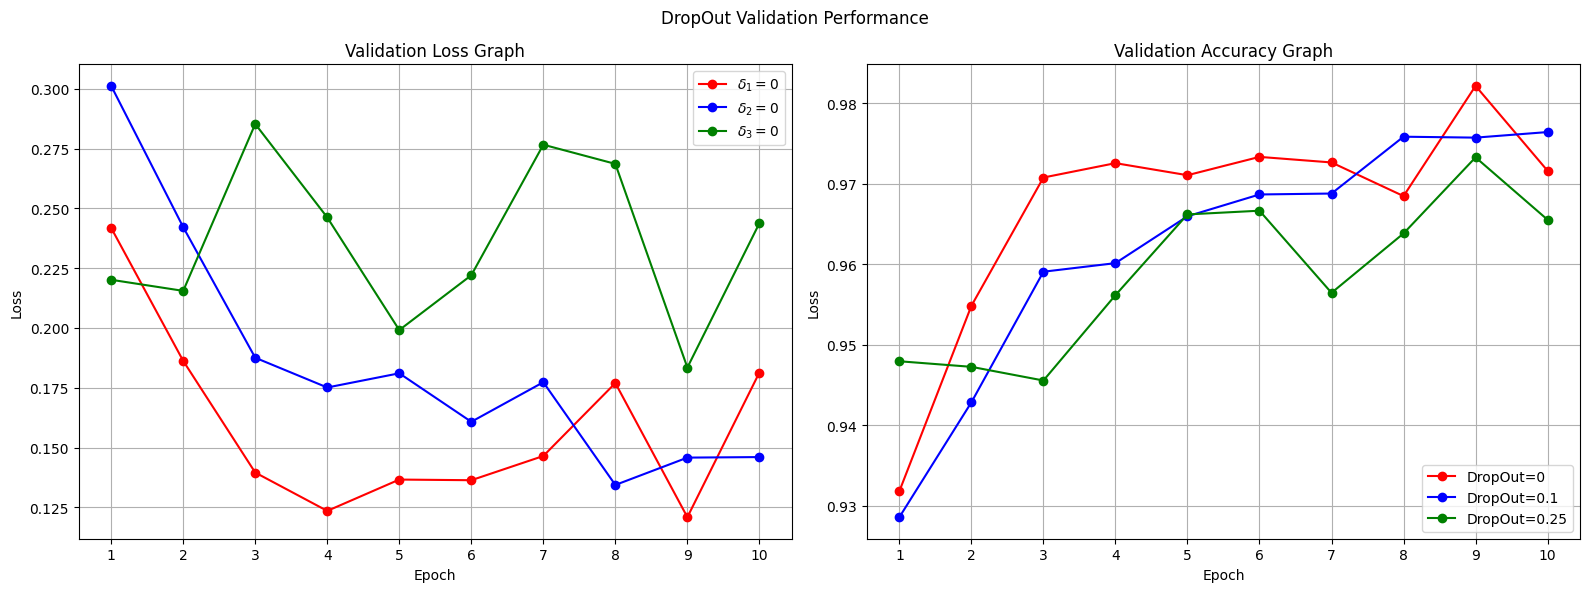

In [22]:
highdrop=np.loadtxt("drop025.dat")
lowdrop=np.loadtxt("drop0.dat")
loss_low=lowdrop[:,2]
loss_high=highdrop[:,2]
acc_low=lowdrop[:,3]
acc_high=highdrop[:,3]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Validation Loss Graph')
plt.xticks(ticks=range(1,n+1)) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,n+1),loss_high,"o-",label="$\delta_{1}=0$",color="red")
plt.plot(range(1,n+1),val_loss,"o-",label="$\delta_{2}=0$",color="blue")
plt.plot(range(1,n+1),loss_low,"o-",label="$\delta_{3}=0$",color="green")
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title("Validation Accuracy Graph")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=range(1,n+1)) 
plt.plot(range(1,n+1),acc_high,"o-",label="DropOut=0",color="red")
plt.plot(range(1,n+1),val_acc,"o-",label="DropOut=0.1",color="blue")
plt.plot(range(1,n+1),acc_low,"o-",label="DropOut=0.25",color="green")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout(rect=[0,0,1,0.95])
plt.suptitle("DropOut Validation Performance")

I grafici mostrano chiaramente che $\delta_{3}$ peggiori significativamente le prestazioni del modello, si nota un aumento dei valori di validation loss e una diminuzione della validation accuracy.
Al contrario $\delta_{1}$ e $\delta_{2}$ raggiungono performance molto simili, ma $\delta_{1}$ sembra abbia già raggiunto il suo massimo livello prestazionale, a causa delle forti oscillazioni nel corso delle ultime epoche, al contrario $\delta_{2}$ ha un miglioramento controllato e sembrerebbe disposto a migliorare ulteriormente con l'aumento delle epoche utilizzate per il training.
Questo rende $\delta_{2}$ la scelta ottimale per l'architettura del nostro modello.

### 4.3 Comparison between Real CNN

Le performance e la struttura del modello sono state confrontate con architetture di riferimento per risolvere il medesimo problema sul dataset Fruit-360.
Il confronto è stato effettuato con le reti ResNet-50 e SC-3, con le relative informazioni ottenute da Liu 2023[8].
Tali reti sono state addestrate su un numero inferiore di classi appartenenti al dataset, 131.
Qui di seguito viene riportata la tabella contenente le principali differenze fra le varie reti:

| Caratteristica              | **FruitCNN**               | **SC-3**             | **ResNet-50**             |
| :-------------------------- | :------------------------- | :------------------- | :------------------------ |
| **Tipo di Modello**         |   CNN Custom               | CNN Custom           | Transfer Learning         |
| **Numero di Classi**        |   206                      | 131                  | 131                       |
| **Parametri Addestrabili**  |   626862                   | 3.3 Milioni          | 25.6 Milioni              |
| **Accuratezza Finale**      |   97.64%                   | 97.81%               | 98.85%                    |
| **Epoche di Training**      |   10                       | 14                   | 10                        |
| **Tempo Medio per Epoca**   |   ~3.77 min                | ~2.43 min            | ~2.80 min                 |
| **Tempo Totale di Training**|   ~37 min                  | ~34 min              | ~28 min                   |

La rete SC-3 utilizza una struttura molto simile a quella di FruitCNN, ma utilizza un numero maggiore di filtri nel primo layer convoluzionale ed un numero maggiore di neuroni nel layer Dence, mentre ResNet-50 usa il transfer learning, apprendendo da una rete già funzionante.
I pregi della nostra architettura sono un numero maggiore di classi apprese e con un numero significativamente ridotto di parametri impiegati nell' apprendimento a parità, se non ridotta, di epoche utilizzate, mantenendo delle performance pressoche identiche di accuracy.
I tempi di addestramento maggiori sono causati principalmente dal maggior numero di classi apprese, inoltre per l' esecuzione del modello è stata utilizzata la RAM di un portatile che può aver influito sui tempi di attesa.
Questo confronto mette in evidenza come il dataset Fruit-360 possa essere appreso con un efficienza elevata anche con una struttura notevolmente più semplice rispetto ai modelli comuni.

## 5 Conclusions:

La rete convoluzionale FruitCNN è riuscita ad apprendere le 206 classi del dataset Fruit-360 con un accuratezza del 97.64%, mostrando come un' architettura più semplice, grazie alla minore quantità di parametri, rispetto a modelli più complessi, possa comunque risolvere efficentemente il problema.
Per migliorare ulteriormente il modello bisognerebbe aggiungere tecniche di transfer learning oppure ampliare il dataset, aggiungendo immagini con frutti non centralizzati, una tecnica chiamata data augmentation, questo permetterebbe al modello di generalizzare meglio le classi apprese.

## 6 References:

[1] H. Mureșan and M. Oltean, "Fruit recognition from images using deep learning", Acta Universitatis Sapientiae, Informatica, 10(1), pp. 26-42, 2018.https://www.kaggle.com/datasets/moltean/fruits.

[2] Chollet, F., et al. (2015). Keras. Software available from keras.io.

[3] Abadi, M., et al. (2015). TensorFlow: Large-Scale Machine Learning on Heterogeneous Distributed Systems. Software available from tensorflow.org.

[4] **reference immagine cnn**

[5] Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in science & engineering, 9(3), 90-95.

[6] Waskom, M. L. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.

[7] Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

[8]Liu, K. (2023). Comparison of different Convolutional Neural Network models on Fruit 360 Dataset.Highlights in Science, Engineering and Technology, 34, 85-94.

[9]Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362.